<a href="https://colab.research.google.com/github/MathewBiddle/sandbox/blob/main/notebooks/MBON_occurrences_in_OBIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title
import gspread
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sys
import sklearn as skl

## For google spreadsheet reading you need to authenticate w/ google
from google.colab import auth
auth.authenticate_user()


from google.auth import default
creds, _ = default()


In [2]:
mbon_reg_url = 'https://docs.google.com/spreadsheets/d/1jBS8ASS27yV8APZ8Fh-tgX6dHdopwianrUZv0kbKcxw/edit#gid=1284796732'

gc = gspread.authorize(creds)
worksheet = gc.open_by_url(mbon_reg_url)
responses = worksheet.worksheet('Form Responses 1')

df = pd.DataFrame(responses.get_all_records())

In [3]:
for dataset in df.loc[df['Has the dataset been submitted to OBIS?']=='Yes','If yes to above, please include appropriate OBIS link(s) here.']:
  print(dataset.split("/")[-1])

d32266b4-d98d-4eed-8207-57dff1f14cc4
ab06f0c6-3de3-447a-b339-a8517f2c95ed
cfceb150-bbe2-4efb-8682-14cfc7167e7c
afef5da2-614b-4208-aee6-c2413ed5ab76
62b97724-da17-4ca7-9b26-b2a22aeaab51
fbf4cb59-cef3-43be-b0ab-0dbab5f51740


In [4]:
import json
from urllib.request import urlopen
import urllib.parse

base = 'https://api.obis.org/v3/occurrence'

cumulative_size = 0

for dataset in df.loc[df['Has the dataset been submitted to OBIS?']=='Yes','If yes to above, please include appropriate OBIS link(s) here.']:

  datasetid = dataset.split("/")[-1]
  url = '{}?datasetid={}'.format(base,datasetid)

#url = https://api.obis.org/v3/occurrence?datasetid=ab06f0c6-3de3-447a-b339-a8517f2c95ed

  response= urlopen(url)

  data_json = json.loads(response.read())

  data = pd.DataFrame(data_json['results'])

  size = data_json['total']

  cumulative_size = cumulative_size + size

  #combined = pd.concat([combined, data],ignore_index=True)

  print("Found %i records." % size)
  print("See in mapper at: %s" % '{}{}#'.format('https://mapper.obis.org/?datasetid=',datasetid))

print("\nFound %i total occurrences." % cumulative_size )

Found 4511 records.
See in mapper at: https://mapper.obis.org/?datasetid=d32266b4-d98d-4eed-8207-57dff1f14cc4#
Found 4840 records.
See in mapper at: https://mapper.obis.org/?datasetid=ab06f0c6-3de3-447a-b339-a8517f2c95ed#
Found 237709 records.
See in mapper at: https://mapper.obis.org/?datasetid=cfceb150-bbe2-4efb-8682-14cfc7167e7c#
Found 1320 records.
See in mapper at: https://mapper.obis.org/?datasetid=afef5da2-614b-4208-aee6-c2413ed5ab76#
Found 64841 records.
See in mapper at: https://mapper.obis.org/?datasetid=62b97724-da17-4ca7-9b26-b2a22aeaab51#
Found 53306 records.
See in mapper at: https://mapper.obis.org/?datasetid=fbf4cb59-cef3-43be-b0ab-0dbab5f51740#

Found 366527 total occurrences.


In [5]:
4511 + 4840 + 237709 + 1320 + 64841 + 53306

366527

In [6]:
try:
  import geopandas
except:
  !pip install geopandas

In [20]:
import geopandas as gpd

base = 'https://api.obis.org/v3/'

combined_data = gpd.GeoDataFrame()

location_data = gpd.GeoDataFrame() # initialize df

# build a list of the subset of fields you want back
fields = ['dataset_id','datasetID','id','decimalLatitude','decimalLongitude','species','aphiaID','date_year']
#fields = ['dataset_id','id']

f = "%2C".join([f"{v}" for v in fields])

datasets = df.loc[df['Has the dataset been submitted to OBIS?']=='Yes','If yes to above, please include appropriate OBIS link(s) here.']

for dataset in datasets:

  gpddf = gpd.GeoDataFrame()

  datasetid = dataset.split("/")[-1] # grab the dataset uuid

  print("Dataset ID:",datasetid)

  url = 'https://api.obis.org/v3/occurrence?datasetid={}'.format(datasetid) # build the API url

  print(url)

  # find out how many occurrences we expect
  response = urlopen(url)
  data_json = json.loads(response.read())
  size = data_json['total']

  print("Found %i records." % size)

  # grab the locations
  url = base + 'occurrence/points?datasetid={}'.format(datasetid)
  response = urlopen(url)
  gpddf = gpd.read_file(url)
  gpddf['dataset_id'] = datasetid

  location_data = pd.concat([location_data, gpddf])

print('Final shape:',location_data.shape)

Dataset ID: d32266b4-d98d-4eed-8207-57dff1f14cc4
https://api.obis.org/v3/occurrence?datasetid=d32266b4-d98d-4eed-8207-57dff1f14cc4
Found 4511 records.
Dataset ID: ab06f0c6-3de3-447a-b339-a8517f2c95ed
https://api.obis.org/v3/occurrence?datasetid=ab06f0c6-3de3-447a-b339-a8517f2c95ed
Found 4840 records.
Dataset ID: cfceb150-bbe2-4efb-8682-14cfc7167e7c
https://api.obis.org/v3/occurrence?datasetid=cfceb150-bbe2-4efb-8682-14cfc7167e7c
Found 237709 records.
Dataset ID: afef5da2-614b-4208-aee6-c2413ed5ab76
https://api.obis.org/v3/occurrence?datasetid=afef5da2-614b-4208-aee6-c2413ed5ab76
Found 1320 records.
Dataset ID: 62b97724-da17-4ca7-9b26-b2a22aeaab51
https://api.obis.org/v3/occurrence?datasetid=62b97724-da17-4ca7-9b26-b2a22aeaab51
Found 64841 records.
Dataset ID: fbf4cb59-cef3-43be-b0ab-0dbab5f51740
https://api.obis.org/v3/occurrence?datasetid=fbf4cb59-cef3-43be-b0ab-0dbab5f51740
Found 53306 records.
Final shape: (6, 2)


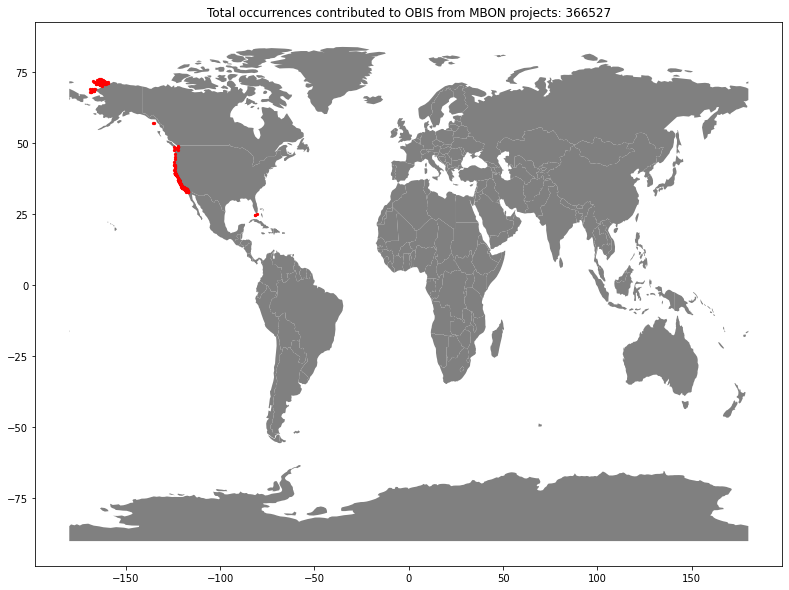

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,10))

world = gpd.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

world.plot(ax=ax, color='grey')

# Need to provide "zorder" to ensure the points are plotted above the polygons
location_data.plot(ax=ax, markersize=5, color='red', zorder=10)

plt.title("Total occurrences contributed to OBIS from MBON projects: %i" % cumulative_size )

plt.show()